# Exercise 06
# TensorFlow and Keras


---

In [1]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

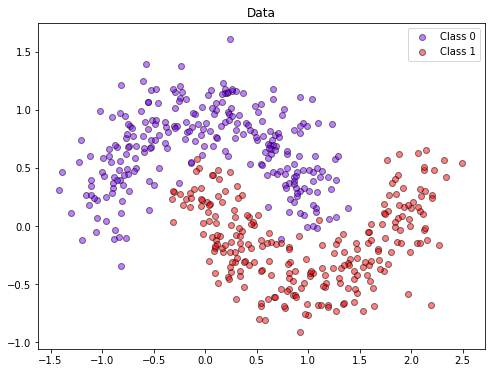

In [2]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

In [3]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline


# Helper functions to inline visualization of computing graphs
# Extracted from: 
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
numN = 10
graph = tf.Graph()
with graph.as_default():
    
    #DATOS ENTRADA:
    x = tf.placeholder(tf.float32,shape=[None,2]) 
    y_true = tf.placeholder(tf.float32,shape=None) 
    
    with tf.name_scope('hidden_layer') as scope: 
        w_1 = tf.Variable(tf.random_normal([numN,2]),dtype=tf.float32,name='weights_1')
        b1 = tf.Variable(tf.random_normal([numN,1]),dtype=tf.float32,name='bias1') 
   
        #h = tf.matmul(w_1,tf.transpose(x)) + b1
        h = tf.sigmoid(tf.matmul(w_1,tf.transpose(x)) + b1, name='sigmoid') #brosfcasting
   
    

    with tf.name_scope('inference') as scope:
        w_2 = tf.Variable(tf.random_normal([1,numN]),dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias') 
        y_pred = tf.sigmoid(tf.matmul(w_2,h) + b )

  
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss) 
  
      with tf.name_scope('train') as scope:
        learning_rate = 1.0
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    
show_graph(graph.as_graph_def())

In [ ]:
Con el anterior codigo se crea la funcion de inferencia, perdida y se realiza el entrenamiento de la red

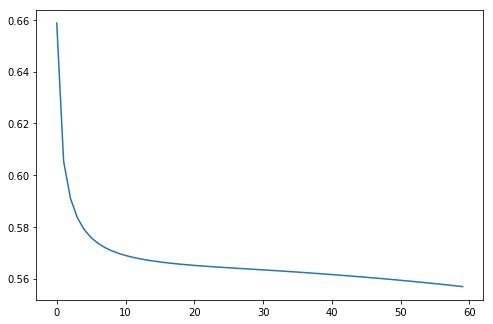

In [6]:
num_epochs = 3000
losses = []

with graph.as_default(): 
    sess = tf.Session()
    sess.run(init)      
    for step in range(num_epochs):
        sess.run(train,{x: x_train, y_true: y_train}) 
        if (step % 50 == 0):
            losses.append(sess.run(loss, {x: x_train, y_true: y_train})) 
                       
pl.figure(figsize = (8,16/3)) 
pl.plot(losses)

In [ ]:
La funcion de perdida da la sensacion graficamente que es mucho menor al 56% y esta seguira descendiento por ende muy seguramente
se realiza una perdida por debajo el 50%

[[ 1.0687407  -1.9776305 ]
 [ 1.6877306  -4.598645  ]
 [ 2.3023572   4.8037925 ]
 [ 1.1639454  -1.4393137 ]
 [ 0.89576596 -0.59114534]
 [ 1.557623    1.1987971 ]
 [-0.8749254   0.20976374]
 [ 3.3005369   1.4441411 ]
 [-0.7331386   1.163764  ]
 [-1.128149    1.9605305 ]]
[[8.825603e-05]]


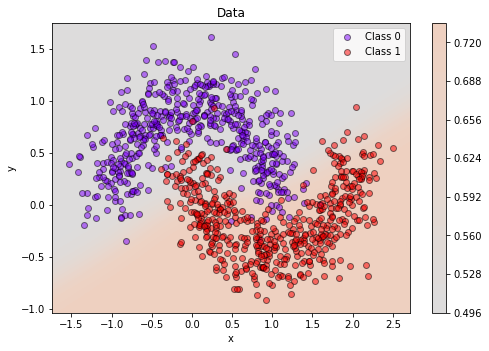

In [7]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

with graph.as_default():
    wval = sess.run(w_1)
    print(wval)
    result = sess.run(y_pred, {x:np.array([[1,2]])}) 
    print(result)
    def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return sigmoid(sess.run(y_pred,{x: xval}))

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, pred_fun)
plot_data(X, Y)

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
import keras
from keras.optimizers import SGD
from keras import initializers

max_words = 3000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')


Loading data...
8982 train sequences
2246 test sequences
46 classes


In [12]:
print(x_train[101])

[1, 2, 149, 8, 25, 2, 400, 304, 200, 6, 337, 4, 342, 2773, 2134, 7, 2, 2, 9, 4, 342, 643, 2134, 7, 2, 4, 88, 1347, 31, 4, 384, 292, 211, 5, 2, 978, 220, 33, 851, 2178, 11, 15, 9, 447, 7, 42, 92, 131, 276, 5, 156, 11, 15, 50, 33, 30, 1285, 7, 2, 383, 29, 336, 25, 383, 29, 2088, 94, 156, 4, 49, 8, 7, 788, 4, 88, 33, 1046, 747, 11, 15, 197, 92, 222, 825, 5, 934, 11, 15, 2, 8, 17, 12]


In [13]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-2] for i in x_train[101][1:]])

557056/550378 [==============================] - 1s 2us/step
['', 'dlr', 'and', 'cts', '', '80', 'average', 'companies', 'in', 'income', 'of', 'make', 'sweden', 'regulations', 'said', '', '', 'a', 'of', 'make', '52', 'regulations', 'said', '', 'of', '1987', 'wholly', '2', 'of', 'sold', 'general', 'states', 'to', '', 'field', 'securities', 'was', 'agricultural', 'calif', '3', 'it', 'a', '1988', 'said', 'as', 'april', '50', 'term', 'to', 'earlier', '3', 'it', 'but', 'was', 'with', 'continental', 'said', '', 'previously', 'be', 'sell', 'cts', 'previously', 'be', 'imbalances', 'more', 'earlier', 'of', 'which', 'and', 'said', 'commerce', 'of', '1987', 'was', 'silver', 'august', '3', 'it', 'export', 'april', 'report', 'vice', 'to', 'beef', '3', 'it', '', 'and', '000', 'for']


In [14]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 3000)
x_test shape: (2246, 3000)


In [15]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


## I. Different Activation Functions for the Hidden Layers

### 1. Elu  & Softmax Activation

In [16]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('elu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_1 (Dense)                (None, 256)                 768256     
______________________________________________________________________
activation_1 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_2 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_2 (Activation)      (None, 46)                  0          
Total params: 780,078
Trainable params: 780,078
Non-trainable params: 0
______________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [23]:
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 3s 431us/step - loss: 1.1811 - acc: 0.7412 - val_loss: 1.3115 - val_acc: 0.7253
Epoch 2/10
8083/8083 [==============================] - 4s 437us/step - loss: 1.1197 - acc: 0.7584 - val_loss: 1.2726 - val_acc: 0.7286
Epoch 3/10
8083/8083 [==============================] - 4s 445us/step - loss: 1.0668 - acc: 0.7709 - val_loss: 1.2415 - val_acc: 0.7353
Epoch 4/10
8083/8083 [==============================] - 4s 461us/step - loss: 1.0211 - acc: 0.7811 - val_loss: 1.2104 - val_acc: 0.7353
Epoch 5/10
8083/8083 [==============================] - 4s 449us/step - loss: 0.9796 - acc: 0.7872 - val_loss: 1.1862 - val_acc: 0.7475
Epoch 6/10
8083/8083 [==============================] - 4s 442us/step - loss: 0.9418 - acc: 0.7976 - val_loss: 1.1664 - val_acc: 0.7519
Epoch 7/10
8083/8083 [==============================] - 4s 445us/step - loss: 0.9078 - acc: 0.8037 - val_loss: 1.1448 - val_acc: 0.7531
E

In [24]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 118us/step
Test score: 1.0555058147688583
Test accuracy: 0.7573463936151401


In [ ]:
El modelo tiene una precision del 75% es decir el 75% de las veces acierta al resultado

### 2. Tanh & Softmax

In [25]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('tanh'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_5 (Dense)                (None, 256)                 768256     
______________________________________________________________________
activation_5 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_6 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_6 (Activation)      (None, 46)                  0          
Total params: 780,078
Trainable params: 780,078
Non-trainable params: 0
______________________________________________________________________


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [28]:
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 3s 424us/step - loss: 1.4241 - acc: 0.6749 - val_loss: 1.4818 - val_acc: 0.6685
Epoch 2/10
8083/8083 [==============================] - 3s 419us/step - loss: 1.3192 - acc: 0.7021 - val_loss: 1.4110 - val_acc: 0.6919
Epoch 3/10
8083/8083 [==============================] - 3s 424us/step - loss: 1.2378 - acc: 0.7252 - val_loss: 1.3539 - val_acc: 0.7075
Epoch 4/10
8083/8083 [==============================] - 4s 447us/step - loss: 1.1703 - acc: 0.7446 - val_loss: 1.3083 - val_acc: 0.7164
Epoch 5/10
8083/8083 [==============================] - 4s 450us/step - loss: 1.1122 - acc: 0.7591 - val_loss: 1.2721 - val_acc: 0.7253
Epoch 6/10
8083/8083 [==============================] - 3s 429us/step - loss: 1.0628 - acc: 0.7694 - val_loss: 1.2421 - val_acc: 0.7308
Epoch 7/10
8083/8083 [==============================] - 3s 428us/step - loss: 1.0181 - acc: 0.7785 - val_loss: 1.2179 - val_acc: 0.7330
E

In [29]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 114us/step
Test score: 1.1071376038361955
Test accuracy: 0.7528940338644723


In [ ]:
El modelo tiene un accuracy del 75% un poco menos por debajo del modelo anterior.

### 3.Relu & Softmax

In [35]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_9 (Dense)                (None, 256)                 768256     
______________________________________________________________________
activation_9 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_10 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_10 (Activation)     (None, 46)                  0          
Total params: 780,078
Trainable params: 780,078
Non-trainable params: 0
______________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [37]:
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 4s 473us/step - loss: 2.3944 - acc: 0.4952 - val_loss: 1.9335 - val_acc: 0.5228
Epoch 2/10
8083/8083 [==============================] - 3s 430us/step - loss: 1.7384 - acc: 0.5780 - val_loss: 1.7031 - val_acc: 0.6140
Epoch 3/10
8083/8083 [==============================] - 3s 430us/step - loss: 1.5586 - acc: 0.6410 - val_loss: 1.5794 - val_acc: 0.6474
Epoch 4/10
8083/8083 [==============================] - 4s 434us/step - loss: 1.4347 - acc: 0.6746 - val_loss: 1.4946 - val_acc: 0.6674
Epoch 5/10
8083/8083 [==============================] - 4s 443us/step - loss: 1.3378 - acc: 0.6975 - val_loss: 1.4247 - val_acc: 0.6796
Epoch 6/10
8083/8083 [==============================] - 4s 438us/step - loss: 1.2580 - acc: 0.7163 - val_loss: 1.3686 - val_acc: 0.7019
Epoch 7/10
8083/8083 [==============================] - 4s 435us/step - loss: 1.1905 - acc: 0.7375 - val_loss: 1.3237 - val_acc: 0.7152
E

In [34]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 117us/step
Test score: 1.1836336378741243
Test accuracy: 0.7395369546124687


In [ ]:
Dado el accuracy obtenido 73% visiblemente menor a los dos modelos anteriores, por tanto la mejor acivacion es la combinacion 
entre  ely y softmax 

### Advanced Activations

In [38]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_11 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dense_12 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_11 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_1 (PReLU)              (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [40]:
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 4s 465us/step - loss: 2.1745 - acc: 0.5065 - val_loss: 1.7767 - val_acc: 0.5984
Epoch 2/10
8083/8083 [==============================] - 3s 428us/step - loss: 1.5890 - acc: 0.6284 - val_loss: 1.5772 - val_acc: 0.6618
Epoch 3/10
8083/8083 [==============================] - 4s 451us/step - loss: 1.4127 - acc: 0.6771 - val_loss: 1.4676 - val_acc: 0.6874
Epoch 4/10
8083/8083 [==============================] - 4s 445us/step - loss: 1.2959 - acc: 0.7057 - val_loss: 1.3914 - val_acc: 0.6974
Epoch 5/10
8083/8083 [==============================] - 4s 435us/step - loss: 1.2084 - acc: 0.7283 - val_loss: 1.3352 - val_acc: 0.7152
Epoch 6/10
8083/8083 [==============================] - 3s 430us/step - loss: 1.1381 - acc: 0.7459 - val_loss: 1.2904 - val_acc: 0.7275
Epoch 7/10
8083/8083 [==============================] - 4s 447us/step - loss: 1.0789 - acc: 0.7635 - val_loss: 1.2519 - val_acc: 0.7353
E

In [41]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 121us/step
Test score: 1.133057284121628
Test accuracy: 0.7479964381387376


## II. Different Optimizers

### 1. RMSprop

In [42]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_13 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dense_14 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_12 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_2 (PReLU)              (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


In [43]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])

In [44]:
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 5s 680us/step - loss: 1.1258 - acc: 0.7576 - val_loss: 0.9735 - val_acc: 0.8042
Epoch 2/10
8083/8083 [==============================] - 5s 654us/step - loss: 0.5051 - acc: 0.8915 - val_loss: 0.8774 - val_acc: 0.8276
Epoch 3/10
8083/8083 [==============================] - 6s 702us/step - loss: 0.3409 - acc: 0.9279 - val_loss: 0.9784 - val_acc: 0.8087
Epoch 4/10
8083/8083 [==============================] - 5s 654us/step - loss: 0.2751 - acc: 0.9415 - val_loss: 1.0832 - val_acc: 0.8131
Epoch 5/10
8083/8083 [==============================] - 5s 674us/step - loss: 0.2368 - acc: 0.9448 - val_loss: 1.1470 - val_acc: 0.8109
Epoch 6/10
8083/8083 [==============================] - 6s 711us/step - loss: 0.2221 - acc: 0.9503 - val_loss: 1.1651 - val_acc: 0.7998
Epoch 7/10
8083/8083 [==============================] - 5s 677us/step - loss: 0.2083 - acc: 0.9522 - val_loss: 1.2706 - val_acc: 0.7931
E

In [45]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 117us/step
Test score: 1.3695869743027862
Test accuracy: 0.784060552092609


In [ ]:
Agregando este optimizador el modelo tiene una mejora en la precision del 0.3 % es decir que pasa del 75% al 78%

### 2. Adagrad

In [46]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_15 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dense_16 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_13 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_3 (PReLU)              (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 5s 632us/step - loss: 1.0316 - acc: 0.7757 - val_loss: 0.8943 - val_acc: 0.7976
Epoch 2/5
8083/8083 [===============

### 3. Adam

In [49]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_21 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dense_22 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_16 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_6 (PReLU)              (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 7s 886us/step - loss: 1.1616 - acc: 0.7539 - val_loss: 0.8857 - val_acc: 0.8109
Epoch 2/10
8083/8083 [=============

### 4. Adamax

In [51]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adamax(),
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_25 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dense_26 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_18 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_8 (PReLU)              (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 7s 814us/step - loss: 1.2134 - acc: 0.7373 - val_loss: 1.0116 - val_acc: 0.7864
Epoch 2/10
8083/8083 [=============

### 5. Nadam

In [52]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_27 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dense_28 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_19 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_9 (PReLU)              (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 8s 959us/step - loss: 1.0742 - acc: 0.7670 - val_loss: 0.8997 - val_acc: 0.8176
Epoch 2/5
8083/8083 [===============

In [ ]:
El mejor optimizador para esta red es el Nadam

## III. Dropout

In [53]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_29 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dropout_1 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_30 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_20 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_10 (PReLU)             (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

## IV. Different Initializers

In [62]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, kernel_initializer='random_normal', input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='random_normal'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_47 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dropout_10 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_48 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_29 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_19 (PReLU)             (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [=======

In [63]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='zeros'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_49 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dropout_11 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_50 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_30 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_20 (PReLU)             (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [=======

In [57]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256,input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='ones'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_37 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dropout_5 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_38 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_24 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_14 (PReLU)             (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 6s 725us/step - loss: 1.2706 - acc: 0.7178 - val_loss: 1.0792 - val_acc: 0.7686
Epoch 2/5
8083/8083 [==============================] - 6s 686us/step - loss: 0.7594 - acc: 0.8291 - val_loss: 0.9723 - val_acc: 0.7909
Epoch 3/5
8083/8083 [==============================] - 6s 798us/step - loss: 0.5841 - acc: 0.8710 - val_loss: 0.9221 - val_acc: 0.8065
Epoch 4/5
8083/8083 [==============================] - 6s 774us/step - loss: 0.4791 - acc: 0.8990 - val_loss: 0.8866 - val_acc: 0.8076
Epoch 5/5
2246/2246 [==============================] - 0s 179us/step
Test score: 0.8258581683769464
Test accuracy: 0.8076580587711487


In [58]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256,input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='glorot_uniform'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_39 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dropout_6 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_40 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_25 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_15 (PReLU)             (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

In [60]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256,input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='Orthogonal'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_43 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dropout_8 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_44 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_27 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_17 (PReLU)             (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [=======

In [61]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256,input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='lecun_normal'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_45 (Dense)               (None, 256)                 768256     
______________________________________________________________________
dropout_9 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_46 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_28 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_18 (PReLU)             (None, 46)                  46         
Total params: 780,124
Trainable params: 780,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [=======

El mejor modelo fue aquel con activacion Prelu el cual presento el mejor accuracy, el cual aumento casi 30% porcentuales pasando del 57% al 81%, anque es importante precisar que el cambio de la activacion mejoro considerablemente el accuracy del modelo.
Los optimzadores mejoraron considerablemente la red pasando de un 57% de accuracy a uno 78%, con el droput elmodelo subo a un poco mas del 80%.
Tambien se pudo observar que los inicializadores disminuyeron el accuray del modelo por ende no son recomendados.
Finalmente se concluye que con una precision mayor el 81% el mejor modelo es que con activacion prely, optimiador adagrad y dropput.